In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [194]:
print("Loading in Data...")

startTime = time.time()

shotFile = "Basketball Data/NBAPlayerTrackingData_2014-17/2016-17_nba_shot_log.csv"
shot_df = pd.read_csv(shotFile)

endTime = time.time()
print("Time Elapsed:", endTime - startTime, "sec")

print("Done!")

Loading in Data...
Time Elapsed: 0.5156824588775635 sec
Done!


In [195]:
print("Compiling Headers...")
print()

print("Shot Log:")
for i in range(len(list(shot_df))):
    print(list(shot_df)[i], i)
print()

print("Done!")

Compiling Headers...

Shot Log:
﻿GAME_ID 0
PERSON_ID 1
TEAM_ID 2
SHOT_ORDER 3
SV_GAME_ID 4
SV_PLAYER_ID 5
SV_TEAM_ID 6
SHOT_RESULT 7
PERIOD 8
GAME_CLOCK 9
WALL_CLOCK 10
DRIBBLES 11
SHOT_DIST 12
TOUCH_TIME 13
CLOSE_DEF_PERSON_ID 14
CLOSE_DEF_SV_PLAYER_ID 15
CLOSE_DEF_DIST 16
PTS_TYPE 17
FGM 18
FGA 19
PTS 20

Done!


In [196]:
# define clustering inputs
X = shot_df[['SHOT_DIST', 'TOUCH_TIME', 'CLOSE_DEF_DIST', 'PTS']]

In [197]:
print("Computing K-Means Clusters...")

# n_clusters = 2 for good shots and bad shots
KMSimulator = KMeans(n_clusters=2, random_state=10).fit(X)
KMS = KMSimulator.labels_

print("Done!")

Computing K-Means Clusters...
Done!


In [198]:
print("Performing Dimensionality Reduction...")

for column in list(X):
    values = X[column]
    mean = np.mean(values)
    std = np.std(values)
    X[column] = (X[column] - mean) / std

PCAnalysis = PCA(n_components=2)
PCAnalysis.fit(X)
X = PCAnalysis.transform(X)

print("Done!")

Performing Dimensionality Reduction...


D:\Calvin Lui\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Done!


In [199]:
x1 = X[:, 0]
x2 = X[:, 1]
labels = KMS
data_points = X.shape[0]

print("# Data Points:", data_points)

# Data Points: 222661


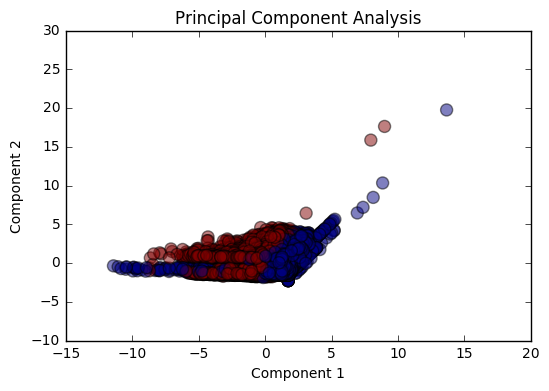

In [206]:
plt.scatter(x1, x2, c=labels, alpha=0.5, s=75)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("Principal Component Analysis")

axes = plt.gca()
axes.set_xlim([-15, 20])
axes.set_ylim([-10,30])

plt.savefig("PCA_Shot_Decision.png")
plt.show()

In [213]:
# Features: ['SHOT_DIST', 'TOUCH_TIME', 'CLOSE_DEF_DIST', 'PTS']
KMSimulator.predict([[5, 5, 10, 0]])

array([0])

In [208]:
KMSimulator.cluster_centers_

array([[  5.49071577,   3.15615455,   2.76091909,   1.08008162],
       [ 22.43600202,   2.49806173,   5.67599737,   0.97726521]])

In [ ]:
shot_df['WALL_CLOCK']